Business Objective:

As we know the concept of Data science and ML is useful in many of the domains, in which one of the emerging domains is Automobile. As we can upfront build predictive models to forecast the revenue of the company, loyal customers analysis. Survival period of the machines etc and a lot of analysis we can perform and prescribe too.

Now we are working on the cars segment where a lot of purchases and sales increased rapidly especially because of the COVID. So, we have a requirement like what's the revenue made by companies like cars24, carwale, spinny even their company margin also increase predominantly. So that if a client establishes the business whether they can survive in the present market, and at what % of market share will be hold by the different companies.


In [1]:
# !pip install numpy==1.26.4
# !pip install --upgrade scikit-learn==1.7.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded= files.upload()

Saving cars24_20221210.csv to cars24_20221210.csv


In [4]:
df= pd.read_csv('cars24_20221210.csv')
df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,storename,isc24assured,registrationcity,registrationstate,benefits,discountprice,price,url,createdDate
0,Hyundai Elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,Hatchback,Kochi-Pns,False,Kozhikode,Kerala,13898,47399,607000,https://www.cars24.com/buy-used-hyundai-elite-...,2022-03-24
1,Maruti Alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,Hatchback,Hi-West Mumbai,False,Mumbai,Maharashtra,12542,2099,326000,https://www.cars24.com/buy-used-maruti-alto-80...,2022-11-09
2,Maruti Dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,Sedan,Vibhuti Khand - Gomti Nagar,False,Lucknow,Uttar Pradesh,13898,26000,640000,https://www.cars24.com/buy-used-maruti-dzire-2...,2022-09-30
3,KIA SELTOS,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,SUV,Bengaluru-Pns,False,Bengaluru,Karnataka,9688,143700,1354000,https://www.cars24.com/buy-used-kia-seltos-202...,2022-07-04
4,Maruti Ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,SUV,Hi-Kolkata,False,Barrackpore,West Bengal,13898,22800,676000,https://www.cars24.com/buy-used-maruti-ertiga-...,2022-10-28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               6437 non-null   object
 1   make               6437 non-null   object
 2   model              6437 non-null   object
 3   city               6437 non-null   object
 4   year               6437 non-null   int64 
 5   fueltype           6437 non-null   object
 6   kilometerdriven    6437 non-null   int64 
 7   ownernumber        6437 non-null   int64 
 8   transmission       6061 non-null   object
 9   bodytype           6062 non-null   object
 10  storename          6437 non-null   object
 11  isc24assured       6437 non-null   bool  
 12  registrationcity   6437 non-null   object
 13  registrationstate  6437 non-null   object
 14  benefits           6437 non-null   int64 
 15  discountprice      6437 non-null   int64 
 16  price              6437 non-null   int64 


In [6]:
df.shape

(6437, 19)

# 1. Data Preprocessing
### 1.1 Dropping Na & Duplicated values

In [7]:
df.isnull().sum()

,0
name,0
make,0
model,0
city,0
year,0
fueltype,0
kilometerdriven,0
ownernumber,0
transmission,376
bodytype,375


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
name,0
make,0
model,0
city,0
year,0
fueltype,0
kilometerdriven,0
ownernumber,0
transmission,0
bodytype,0


In [10]:
df.duplicated().sum()

14

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(6047, 19)

### 1.2 Removing Unwanted Columns

In [14]:
df.drop(['registrationcity','storename','url', 'createdDate'], axis= 1, inplace=True)

In [15]:
df.describe()

,year,kilometerdriven,ownernumber,benefits,discountprice,price
count,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6.047000e+03
mean,2017.471639,42720.915165,1.242434,12128.360179,22296.521912,6.581152e+05
std,2.622484,26097.674189,0.460226,2485.202008,39989.517527,3.321450e+05
min,2008.000000,64.000000,1.000000,9688.000000,-155500.000000,1.340000e+05
25%,2016.000000,21961.000000,1.000000,9688.000000,-200.000000,4.284995e+05
50%,2018.000000,39542.000000,1.000000,12542.000000,9900.000000,5.710000e+05
75%,2019.000000,60269.000000,1.000000,13898.000000,35300.000000,7.970000e+05
max,2022.000000,455601.000000,3.000000,19407.000000,388300.000000,3.048000e+06


### 1.3 Checking for Outliers in 'Price' (i.e target column)

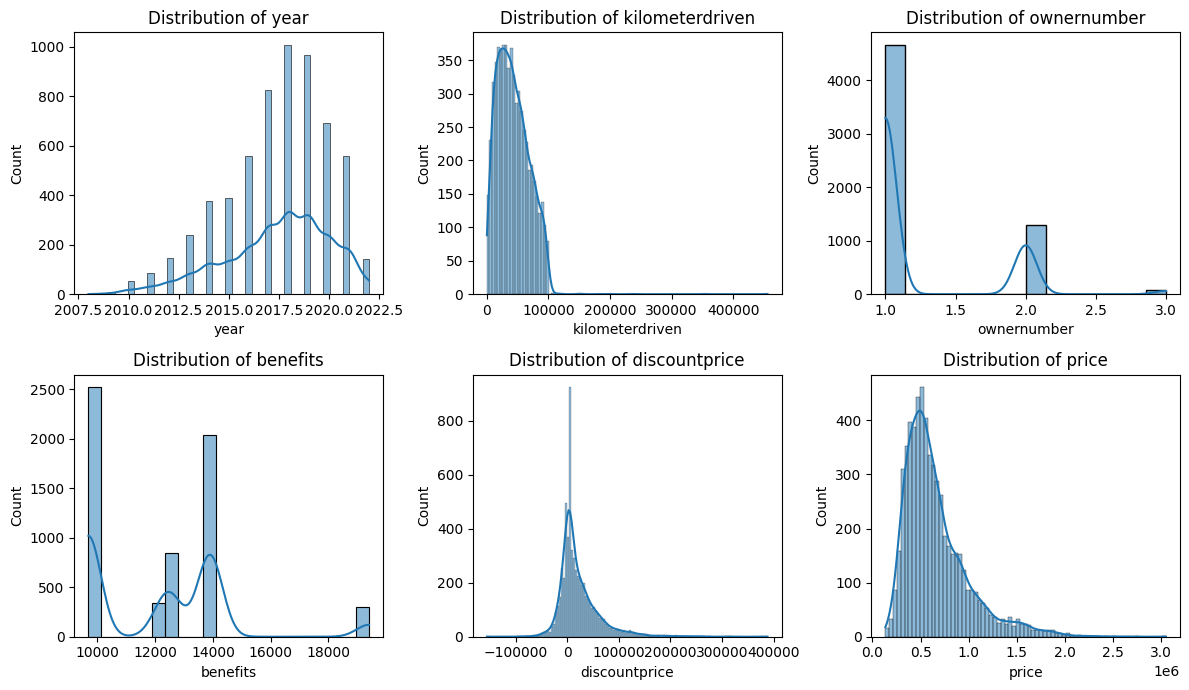

In [16]:
cols = ['year', 'kilometerdriven', 'ownernumber', 'benefits', 'discountprice', 'price']

fig, axes= plt.subplots(nrows= 2, ncols= 3, figsize= (12,7))
axes = axes.flatten() # Flatten so we can loop easily

for i, col in enumerate(cols):
  sns.histplot(data= df, x= col, kde= True, ax= axes[i])
  axes[i].set_xlabel(col)
  axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [17]:
df['price'].min()

134000

In [18]:
df['price'].max()

3048000

In [19]:
df[df['price'] == df['price'].min()]

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,registrationstate,benefits,discountprice,price
5751,Maruti Alto,Maruti,Alto,New Delhi,2010,Petrol,70516,2,Manual,Hatchback,False,Delhi,12542,12800,134000


In [20]:
df[df['price'] == df['price'].max()]

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,registrationstate,benefits,discountprice,price
5083,Ford Endeavour,Ford,Endeavour,Hyderabad,2020,Diesel,94795,1,Automatic,Luxury SUV,False,Telangana,9688,195000,3048000


In [21]:
df.shape

(6047, 15)

In [22]:
# Quantile-based Outlier treatment
# q_low= df['price'].quantile(0.01)
# q_high= df['price'].quantile(0.99)
# df= df[((df['price'] >= q_low) & (df['price'] <= q_high))]

for col in ['kilometerdriven',  'discountprice', 'price']:
  df= df[df[col].between(df[col].quantile(0.01), df[col].quantile(0.99))]

In [23]:
df.reset_index(drop= True, inplace= True)

In [24]:
df.shape

(5687, 15)

In [25]:
df[df['price'] == df['price'].min()]

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,registrationstate,benefits,discountprice,price
2169,Hyundai i10,Hyundai,I10,Noida,2011,Petrol,56559,2,Manual,Hatchback,False,Uttar Pradesh,9688,-1000,219000
4277,Maruti Alto K10,Maruti,Alto K10,Mohali,2011,Petrol,89828,2,Manual,Hatchback,False,Chandigarh,12542,-6100,219000
4713,Maruti Alto 800,Maruti,Alto 800,Kolkata,2013,Petrol,19228,1,Manual,Hatchback,False,West Bengal,9688,-7000,219000


In [26]:
df[df['price'] == df['price'].max()]

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,registrationstate,benefits,discountprice,price
695,Tata Harrier,Tata,Harrier,Indore,2021,Diesel,32514,1,Manual,SUV,False,Madhya Pradesh,9688,131800,1758000
3995,KIA SELTOS,Kia,Seltos,Chandigarh,2020,Diesel,74899,1,Automatic,SUV,False,Chandigarh,13898,83900,1758000


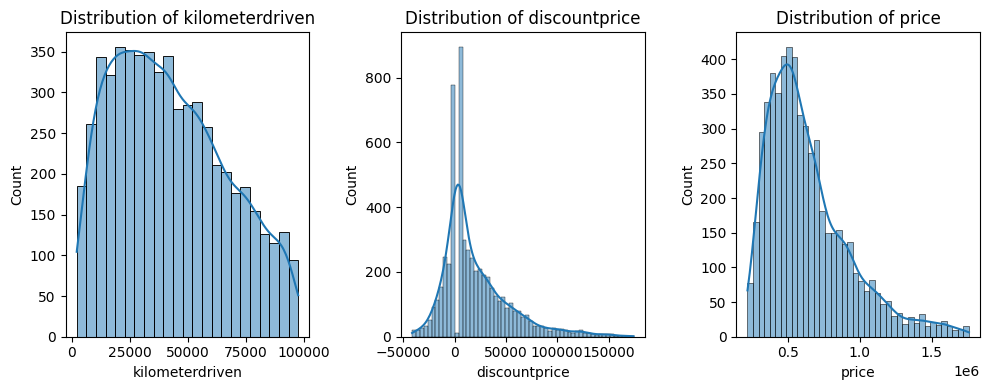

In [27]:
cols = ['kilometerdriven', 'discountprice', 'price']

fig, axes= plt.subplots(nrows= 1, ncols= 3, figsize= (10,4))
axes = axes.flatten() # Flatten so we can loop easily

for i, col in enumerate(cols):
  sns.histplot(data= df, x= col, kde= True, ax= axes[i])
  axes[i].set_xlabel(col)
  axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### 1.4 Converting the name and bodytype values to lower



In [28]:
df['name'] = df['name'].str.lower()
df['bodytype'] = df['bodytype'].str.lower()

In [29]:
df.tail(3)

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,registrationstate,benefits,discountprice,price
5684,hyundai i10,Hyundai,I10,Hyderabad,2014,Petrol,61249,1,Manual,hatchback,False,Telangana,13898,0,351000
5685,maruti swift dzire,Maruti,Swift Dzire,Hyderabad,2014,Petrol,48081,1,Manual,sedan,False,Telangana,13898,0,494000
5686,renault kwid,Renault,Kwid,Hyderabad,2019,Petrol,54490,1,Manual,hatchback,False,Telangana,12542,0,371000


### 1.5 Create new columns from existing

In [30]:
current_year= 2025
df['car_age']= current_year -df['year']
#df['price_per_km']= df['price']/df['kilometerdriven']

# 2. EDA

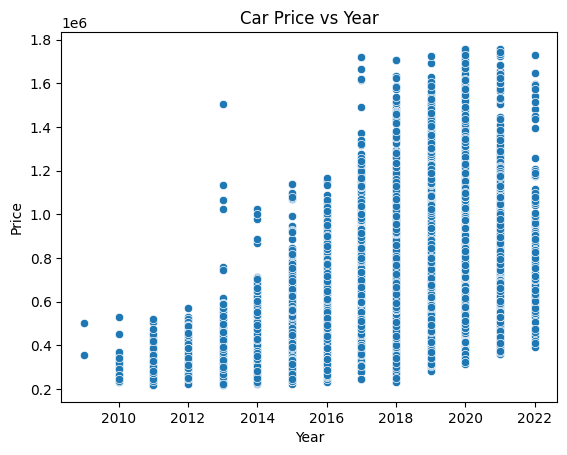

In [31]:
# 1. Price vs. Year
sns.scatterplot(data= df, x= 'year', y= 'price')
plt.title('Car Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

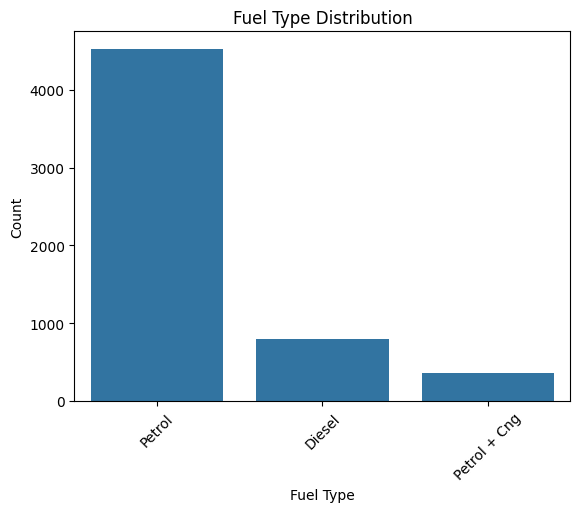

In [32]:
# 2. Fuel Type Distribution
sns.countplot(data= df, x= 'fueltype', order= df['fueltype'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

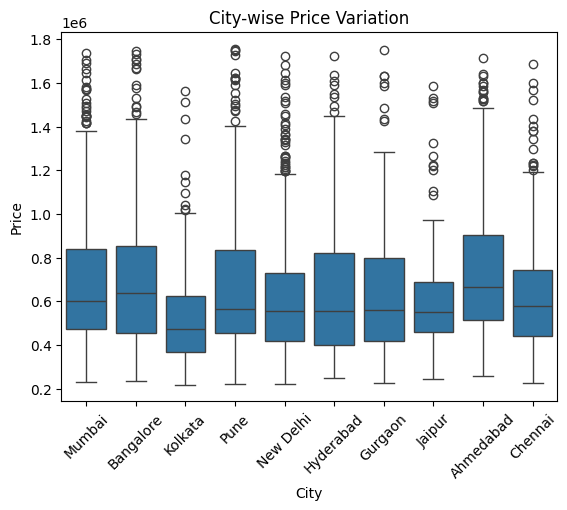

In [33]:
# 3. City-wise Price Variation
top_cities= df['city'].value_counts().nlargest(10).index
sns.boxplot(data= df[df['city'].isin(top_cities)], x= 'city', y= 'price')
plt.title('City-wise Price Variation')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation= 45)
plt.show()

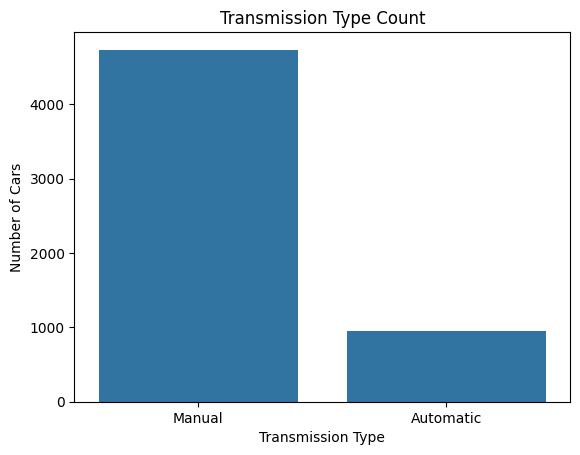

In [34]:
# 4. Transmission Type Count
sns.countplot(data= df, x= 'transmission')
plt.title('Transmission Type Count')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()

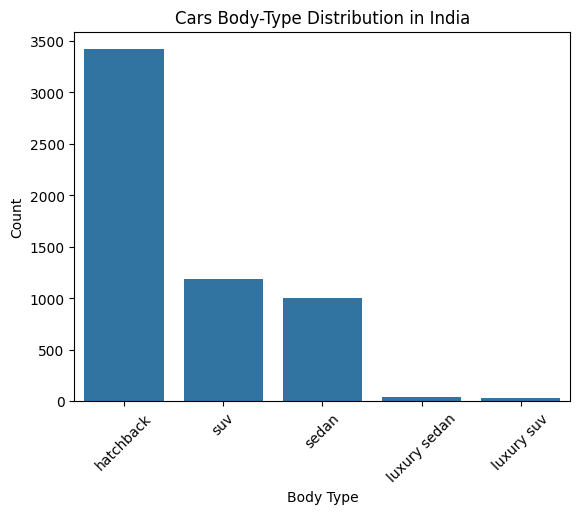

In [35]:
# 5. Body Type Analysis
sns.countplot(data= df, x= 'bodytype', order= df['bodytype']. value_counts().index)
plt.title('Cars Body-Type Distribution in India')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

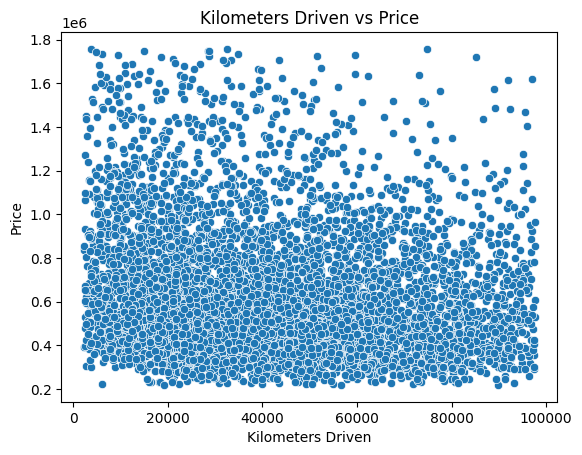

In [36]:
# 6. Kilometers Driver vs Price
sns.scatterplot(data= df, x= 'kilometerdriven', y= 'price')
plt.title('Kilometers Driven vs Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

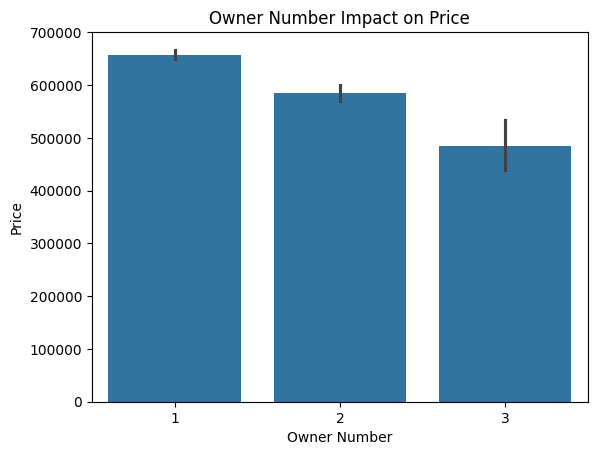

In [37]:
# 7. Owner Number Impact on Price
sns.barplot(data= df, x= 'ownernumber', y= 'price')
plt.title('Owner Number Impact on Price')
plt.xlabel('Owner Number')
plt.ylabel('Price')
plt.show()

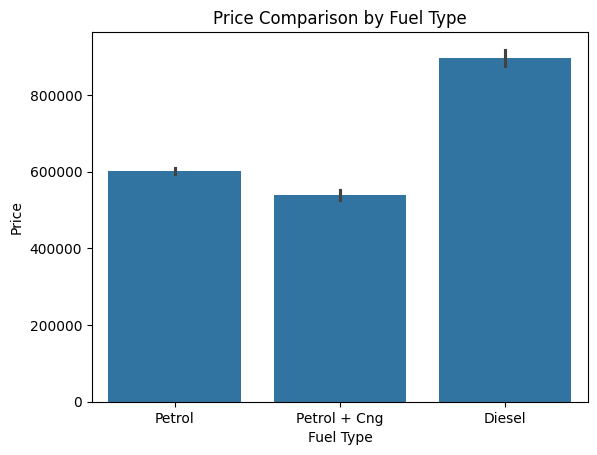

In [38]:
# 8. Price vs. Fuel Type
sns.barplot(data=df, x='fueltype', y='price')
plt.title('Price Comparison by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

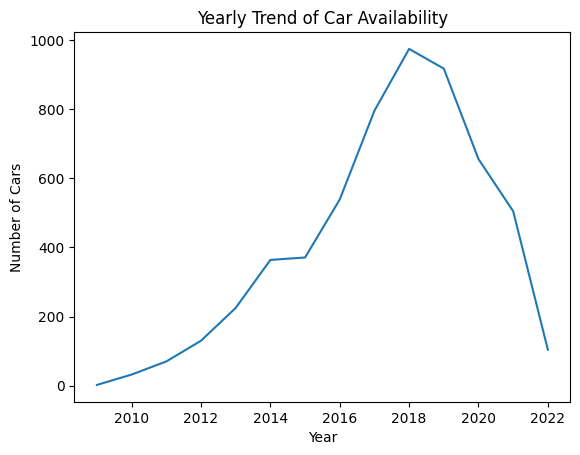

In [39]:
# 9. Yearly Trend of Car Availability
year_counts= df['year'].value_counts().sort_index()
sns.lineplot(x= year_counts.index, y= year_counts.values)
plt.title('Yearly Trend of Car Availability')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

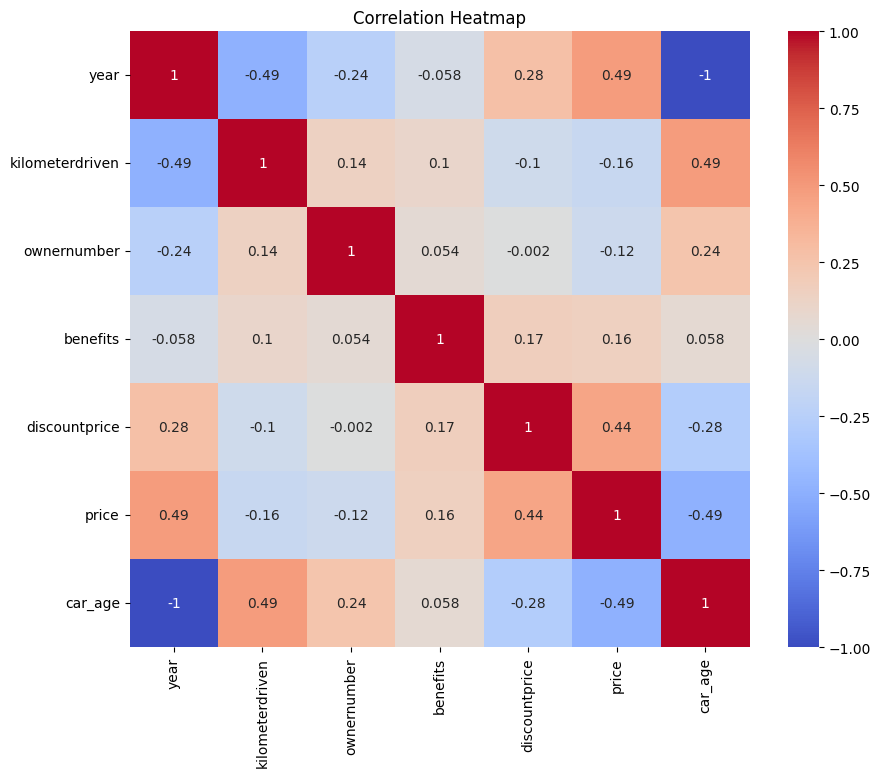

In [40]:
# 10. Correlation Heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

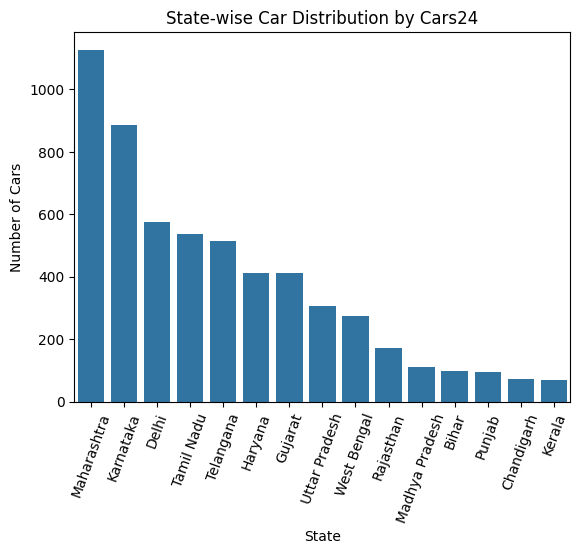

In [41]:
# 11. State-wise Distribution
state_counts= df['registrationstate'].value_counts().nlargest(15)
sns.barplot(x= state_counts.index, y= state_counts.values)
plt.title('State-wise Car Distribution by Cars24')
plt.xlabel('State')
plt.ylabel('Number of Cars')
plt.xticks(rotation= 70)
plt.show()

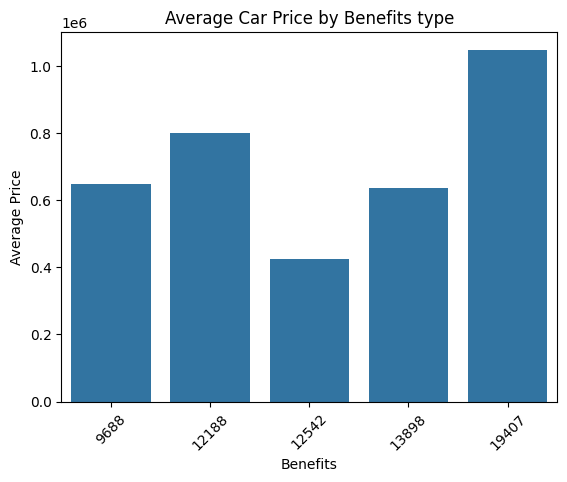

In [42]:
# 12. Benefits vs. Price
benefit_avg= df.groupby('benefits')['price'].mean().sort_values(ascending= False).head(10)
sns.barplot(x= benefit_avg.index, y= benefit_avg.values)
plt.title('Average Car Price by Benefits type')
plt.xlabel('Benefits')
plt.ylabel('Average Price')
plt.xticks(rotation= 45)
plt.show()

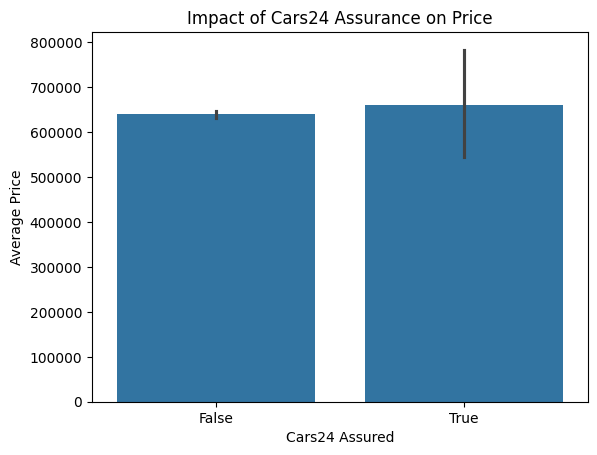

In [43]:
# 13. Cars24 Assurance Impact
sns.barplot(data= df, x= 'isc24assured', y= 'price')
plt.title('Impact of Cars24 Assurance on Price')
plt.xlabel('Cars24 Assured')
plt.ylabel('Average Price')
plt.show()

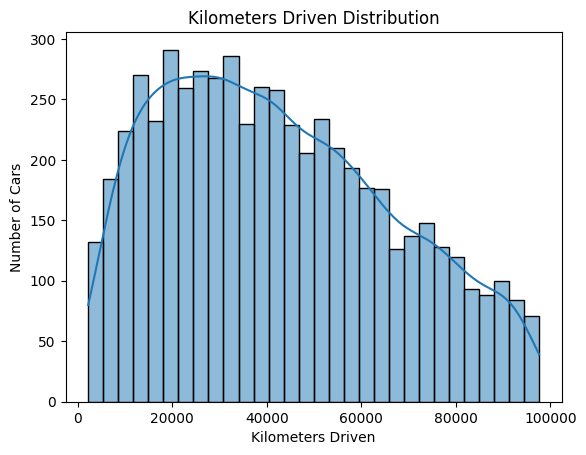

In [44]:
# 14. Kilometers Driven Distribution
sns.histplot(df['kilometerdriven'], bins=30, kde=True)
plt.title('Kilometers Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.ylabel('Number of Cars')
plt.show()

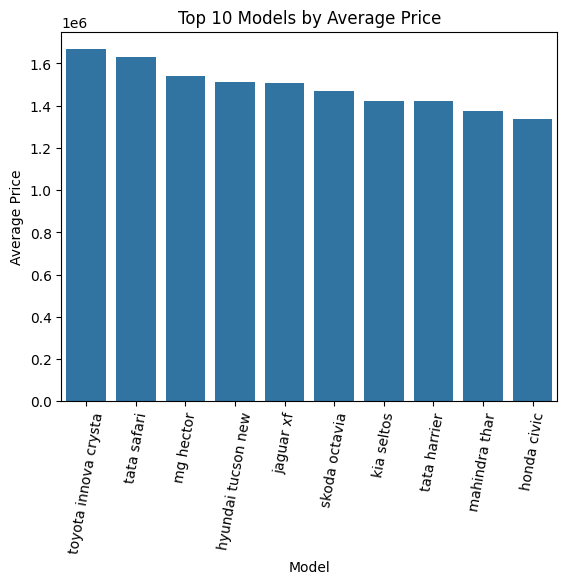

In [45]:
# 15. Top Models by Price
top_models = df.groupby('name')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Top 10 Models by Average Price')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=80)
plt.show()

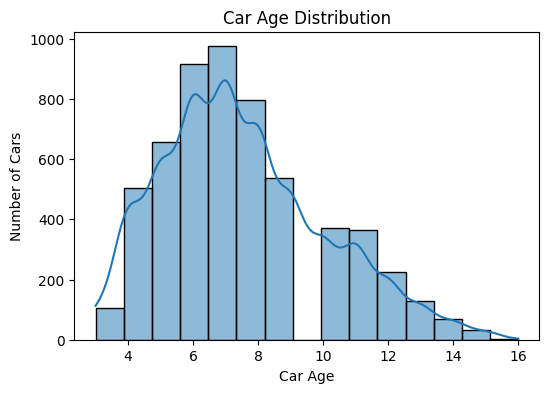

In [46]:
# 16. Car Age Histogram
plt.figure(figsize= (6,4))
sns.histplot(df['car_age'], bins= 15, kde= True)
plt.title('Car Age Distribution')
plt.xlabel('Car Age')
plt.ylabel('Number of Cars')
plt.show()

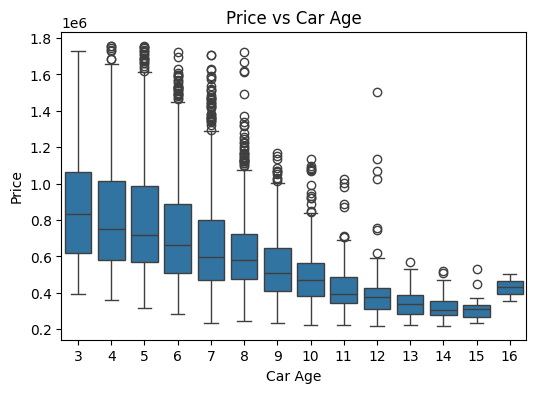

In [47]:
# 17. Price vs Car Age
plt.figure(figsize= (6,4))
sns.boxplot(x= 'car_age', y= 'price', data= df)
plt.title('Price vs Car Age')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()

# 3. Feature Engineering
## 3.1 Scaling (only numerical features) & Encoding (for Categorical Features)

In [48]:
df.head()

,name,make,model,city,year,fueltype,kilometerdriven,ownernumber,transmission,bodytype,isc24assured,registrationstate,benefits,discountprice,price,car_age
0,hyundai elite i20,Hyundai,Elite I20,Kochi,2017,Petrol,35939,2,Manual,hatchback,False,Kerala,13898,47399,607000,8
1,maruti alto 800,Maruti,Alto 800,Mumbai,2016,Petrol + Cng,6180,1,Manual,hatchback,False,Maharashtra,12542,2099,326000,9
2,maruti dzire,Maruti,Dzire,Lucknow,2019,Petrol + Cng,46808,1,Manual,sedan,False,Uttar Pradesh,13898,26000,640000,6
3,kia seltos,Kia,Seltos,Bangalore,2020,Diesel,26045,1,Manual,suv,False,Karnataka,9688,143700,1354000,5
4,maruti ertiga,Maruti,Ertiga,Kolkata,2017,Petrol,53056,1,Manual,suv,False,West Bengal,13898,22800,676000,8


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X= df.drop(columns= ['price'])
y= df['price']

# Numerical Features to scale
numerical_features= ['year', 'kilometerdriven', 'ownernumber', 'benefits', 'discountprice', 'car_age']

# Define Categorical features
low_card_cat= ['fueltype', 'transmission', 'bodytype', 'isc24assured']
high_card_cat= ['model','make', 'city', 'registrationstate']

# Column tranfromer for encoding + scaling
preprocessor= ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numerical_features),
        ('low_cat', OneHotEncoder(handle_unknown='ignore'), low_card_cat),
        ('high_cat', OneHotEncoder(handle_unknown= 'ignore'), high_card_cat) # can replace with Target/Freg encoding if too many categoreis
    ]
)

# Fit + transform
X_processed= preprocessor.fit_transform(X)

print(X_processed.shape)

(5687, 200)


In [50]:
import joblib

# Save the fitted preprocessor
joblib.dump(preprocessor, "car_price_preprocessor.pkl")

print("Preprocessor saved successfully!")

Preprocessor saved successfully!


## 3.2 Train-Test Splitting

In [51]:
# Train-test split
from sklearn.model_selection import train_test_split

X_trains, X_tests, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

# Fit only on training set, then transform both
X_train= preprocessor.fit_transform(X_trains)
X_test= preprocessor.transform(X_tests) # Does not recalculate mean & std; Uses the same mean & std from training data to scale test data.

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4549, 198)
Test shape: (1138, 198)


## 3.3  Feature Importance

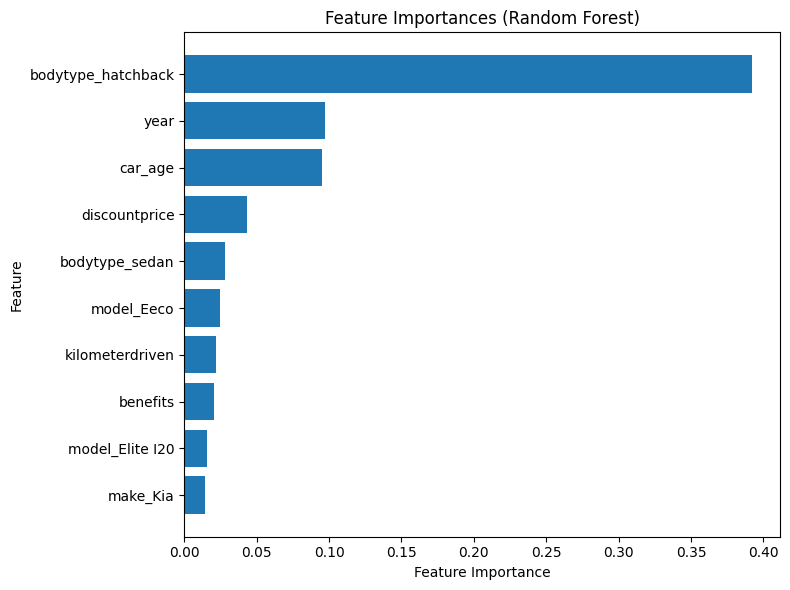

In [52]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 4. Recover feature names
num_features = numerical_features
low_card_features = preprocessor.named_transformers_['low_cat'].get_feature_names_out(low_card_cat)
high_card_features = preprocessor.named_transformers_['high_cat'].get_feature_names_out(high_card_cat)

feature_names = np.concatenate([num_features, low_card_features, high_card_features])

# 5. Train RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# 4. Model Building

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, params, X_train, X_test, y_train, y_test):
  grid = GridSearchCV(estimator= model, param_grid= params, cv= 5, scoring= 'r2', n_jobs= -1, verbose= 1)
  grid.fit(X_train, y_train)
  best_model= grid.best_estimator_
  print(f"Best Params: {grid.best_params_}")

  # Predictions
  y_pred= best_model.predict(X_test)

  # Metrics
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test, y_pred)
  r2= r2_score(y_test, y_pred)

  print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
  return best_model

### 4.1. Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lr_model= evaluate_model(LinearRegression(), {}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {}
MSE: 6938433979.0594, RMSE: 83297.2627, MAE: 59457.6638, R2: 0.9156


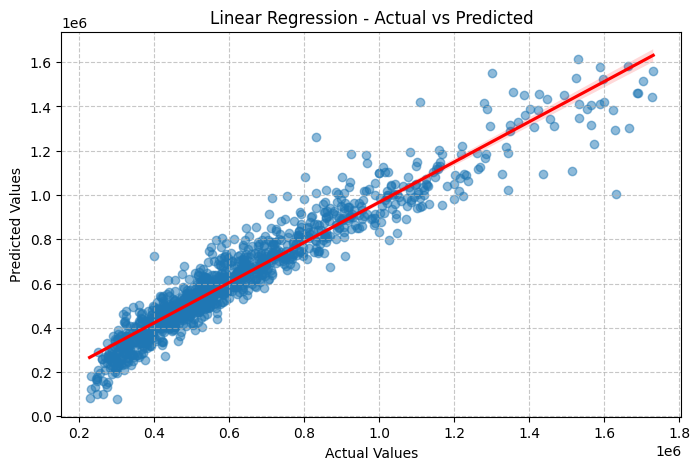

In [55]:
# Predict using your trained model (lr_model)
y_pred = lr_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title("Linear Regression - Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### 4.2. Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

ridge_model= evaluate_model(Ridge(random_state=42), {'alpha': [0.1, 1.0, 10.0]}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params: {'alpha': 0.1}
MSE: 6847314683.3868, RMSE: 82748.5026, MAE: 59361.4248, R2: 0.9167


### 4.3. Decision Tree Regressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_model= evaluate_model(DecisionTreeRegressor(random_state= 42), {"max_depth": [5, 10, 20, None]},
                         X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'max_depth': 20}
MSE: 12267592020.9238, RMSE: 110759.1622, MAE: 69653.2198, R2: 0.8508


### 4.4. Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model= evaluate_model(RandomForestRegressor(random_state= 42, n_jobs= -1), {"n_estimators": [100, 200], "max_depth": [10, None], 'min_samples_split': [2,5],
                         'min_samples_leaf': [1,2]}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 6922575787.4363, RMSE: 83202.0179, MAE: 53890.7813, R2: 0.9158


### 4.5. GradientBoostingRegressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model= evaluate_model(GradientBoostingRegressor(random_state= 42), {"n_estimators": [100,200], "learning_rate": [0.05, 0.1, 0.2], "max_depth": [3,5,7]},
                         X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
MSE: 5100111261.0702, RMSE: 71415.0633, MAE: 48389.3890, R2: 0.9380


### 4.6. K Neighbors Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knn_model= evaluate_model(KNeighborsRegressor(), {"n_neighbors": [3,5,7,9]}, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'n_neighbors': 5}
MSE: 15427345280.8994, RMSE: 124206.8649, MAE: 82752.4359, R2: 0.8124


### 4.7. Hist Gradient Boosting Regressor

In [61]:
from sklearn.ensemble import HistGradientBoostingRegressor

# cOnvert to dense arrays if sparse
X_train_dense= X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense= X_test.toarray() if hasattr(X_test, 'toarray') else X_test

hgb_model= evaluate_model(HistGradientBoostingRegressor(random_state= 42), {"max_iter": [100, 200, 300], "learning_rate": [0.05, 0.1, 0.2]},
                          X_train_dense, X_test_dense, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Params: {'learning_rate': 0.1, 'max_iter': 200}
MSE: 6533051150.8585, RMSE: 80827.2921, MAE: 51182.3835, R2: 0.9206


### 4.8. XGB Regressor

In [62]:
from xgboost import XGBRegressor

xgb_model= evaluate_model(XGBRegressor(random_state= 42, n_jobs= -1), {"n_estimators": [100, 200], "max_depth": [3,5,7], "learning_rate": [0.05, 0.1, 0.2]},
                          X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
MSE: 5488844800.0000, RMSE: 74086.7384, MAE: 49861.6680, R2: 0.9333


### 4.9. LGBM Regressor

In [63]:
from lightgbm import LGBMRegressor

lgbm_model= evaluate_model(LGBMRegressor(random_state= 42), {"n_estimators": [100, 200], "num_leaves": [31, 63], "learning_rate": [0.05, 0.1, 0.2]},
                           X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 4549, number of used features: 122
[LightGBM] [Info] Start training from score 640124.820400
Best Params: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}
MSE: 6493509540.3441, RMSE: 80582.3153, MAE: 51353.5388, R2: 0.9210


### 4.10. CatBoost Regressor

In [64]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.1 MB/s eta 0:00:00


In [65]:
from catboost import CatBoostRegressor

cat_model= evaluate_model(CatBoostRegressor(verbose= 0, random_state= 42), {"n_estimators": [100, 200], "depth": [4,6,8], "learning_rate": [0.05, 0.1, 0.2]},
                          X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Params: {'depth': 8, 'learning_rate': 0.2, 'n_estimators': 200}
MSE: 5081760605.2775, RMSE: 71286.4686, MAE: 47910.8424, R2: 0.9382


### 4.11. AdaBoost Regressor

In [66]:
from sklearn.ensemble import AdaBoostRegressor

ada_model= evaluate_model(AdaBoostRegressor(random_state= 42), {"n_estimators": [50, 100, 200, 300], "learning_rate": [0.05, 0.1, 0.2, 1.0]},
                          X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Params: {'learning_rate': 0.1, 'n_estimators': 300}
MSE: 24470914030.1953, RMSE: 156431.8191, MAE: 121310.1104, R2: 0.7024


### 4.12. ExtraTrees Regressor

In [67]:
from sklearn.ensemble import ExtraTreesRegressor

et_model= evaluate_model(ExtraTreesRegressor(random_state= 42, n_jobs= -1), {"n_estimators": [100, 200, 300], "max_depth": [10, 20, None]},
                         X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Params: {'max_depth': None, 'n_estimators': 100}
MSE: 5992056802.6653, RMSE: 77408.3768, MAE: 50626.6954, R2: 0.9271


# 5. Model Evaluation

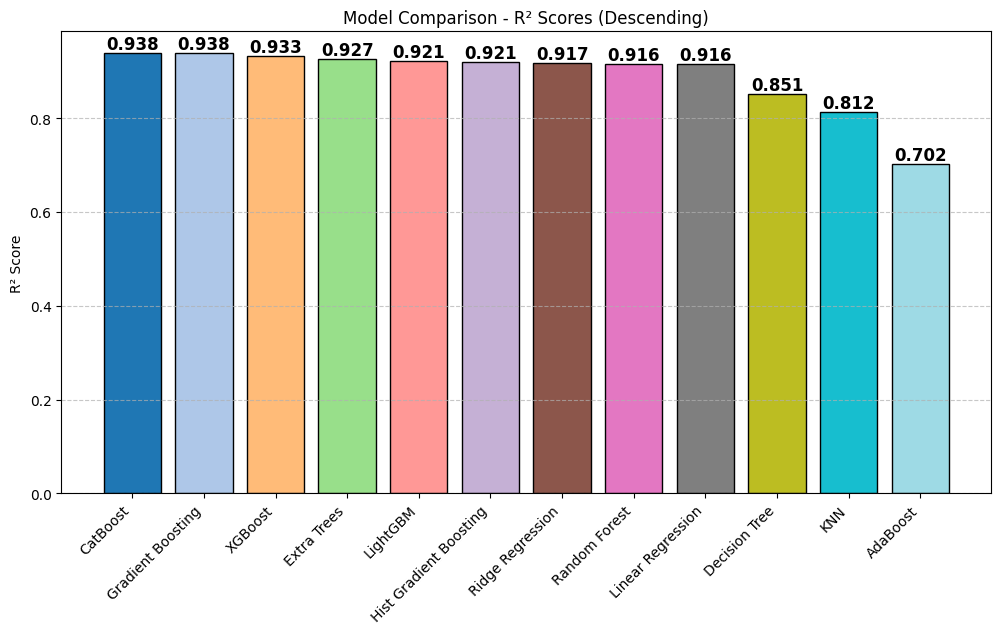

In [68]:
# Dictionary of models (assuming you already trained them)
models = {
    "Random Forest": rf_model,
    "Linear Regression": lr_model,
    "Ridge Regression": ridge_model,
    "Gradient Boosting": gb_model,
    "KNN": knn_model,
    "Hist Gradient Boosting": hgb_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model,
    "CatBoost": cat_model,
    "Decision Tree": dt_model,
    "Extra Trees": et_model,
    "AdaBoost": ada_model
}

# Compute R2 scores for each model
r2_scores = {}
for name, model in models.items():
    try:
        r2_scores[name] = model.score(X_test, y_test)
    except TypeError:  # if model cannot handle sparse
        r2_scores[name] = model.score(X_test.toarray(), y_test)


# Sort models by R² score (descending order)
sorted_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
model_names, scores = zip(*sorted_scores)

# Create unique colors for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(model_names)))

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, scores, color=colors, edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Scores (Descending)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars with values
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{score:.3f}", ha="center", va="bottom", fontsize=12, fontweight='bold')

plt.show()

# 6. Saving the best model

In [69]:
from sklearn.ensemble import HistGradientBoostingRegressor
import joblib

# Convert full dataset to dense (if sparse)
X_full_dense = X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed

# Train the final model with best params on the full dataset
final_hgb_model = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=200, random_state=42)

final_hgb_model.fit(X_full_dense, y)

# Save the trained model
joblib.dump(final_hgb_model, "hist_gradient_boosting_model.joblib")

print("Model trained on full dataset and saved as 'hist_gradient_boosting_model.joblib'")

Model trained on full dataset and saved as 'hist_gradient_boosting_model.joblib'


In [70]:
import numpy as np
import sklearn

print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)


NumPy version: 1.26.4
scikit-learn version: 1.7.1
